## Solutions

### Exercise 1

In [35]:
employ = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv')
employ = employ.pivot_table(values='Value',
                            index=['DATE'],
                            columns=['UNIT','AGE', 'SEX', 'INDIC_EM', 'GEO'])
employ.index = pd.to_datetime(employ.index) # ensure that dates are datetime format
employ.head()

UNIT       Percentage of total population                       ...        \
AGE                   From 15 to 24 years                       ...         
SEX                               Females                       ...         
INDIC_EM                Active population                       ...         
GEO                               Austria Belgium Bulgaria      ...         
DATE                                                            ...         
2007-01-01                          56.00   31.60    26.00      ...         
2008-01-01                          56.20   30.80    26.10      ...         
2009-01-01                          56.20   29.90    24.80      ...         
2010-01-01                          54.00   29.80    26.60      ...         
2011-01-01                          54.80   29.80    24.80      ...         

UNIT                                           Thousand persons           \
AGE                                         From 55 to 64 years            
SEX                                                       Total            
INDIC_EM   Total employment (resident population concept - LFS)            
GEO                                                 Switzerland   Turkey   
DATE                                                                       
2007-01-01                                                nan   1,282.00   
2008-01-01                                                nan   1,354.00   
2009-01-01                                                nan   1,449.00   
2010-01-01                                             640.00   1,583.00   
2011-01-01                                             661.00   1,760.00   

UNIT                       
AGE                        
SEX                        
INDIC_EM                   
GEO        United Kingdom  
DATE                       
2007-01-01       4,131.00  
2008-01-01       4,204.00  
2009-01-01       4,193.00  
2010-01-01       4,186.00  
2011-01-01       4,164.00  

[5 rows x 1440 columns]

This is a large dataset so it is useful to explore the levels and
variables available

In [36]:
employ.columns.names

FrozenList(['UNIT', 'AGE', 'SEX', 'INDIC_EM', 'GEO'])

Variables within levels can be quickly retrieved with a loop

In [37]:
for name in employ.columns.names:
    print(name, employ.columns.get_level_values(name).unique())

UNIT Index(['Percentage of total population', 'Thousand persons'], dtype='object', name='UNIT')
AGE Index(['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years'], dtype='object', name='AGE')
SEX Index(['Females', 'Males', 'Total'], dtype='object', name='SEX')
INDIC_EM Index(['Active population', 'Total employment (resident population concept - LFS)'], dtype='object', name='INDIC_EM')
GEO Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Euro area (17 countries)',
       'Euro area (18 countries)', 'Euro area (19 countries)',
       'European Union (15 countries)', 'European Union (27 countries)',
       'European Union (28 countries)', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Neth

### Exercise 2

To easily filter by country, swap `GEO` to the top level and sort the
`MultiIndex`

In [38]:
employ.columns = employ.columns.swaplevel(0,-1)
employ = employ.sort_index(axis=1)

We need to get rid of a few items in `GEO` which are not countries

A fast way to get rid of the EU areas is to use a list comprehension to
find the level values in `GEO` that begin with ‘Euro’

In [39]:
geo_list = employ.columns.get_level_values('GEO').unique().tolist()
countries = [x for x in geo_list if not x.startswith('Euro')]
employ = employ[countries]
employ.columns.get_level_values('GEO').unique()

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')

Select only percentage employed in the active population from the
dataframe

In [40]:
employ_f = employ.xs(('Percentage of total population', 'Active population'),
                     level=('UNIT', 'INDIC_EM'),
                     axis=1)
employ_f.head()

GEO                    Austria              ...       United Kingdom        \
AGE        From 15 to 24 years              ...  From 55 to 64 years         
SEX                    Females Males Total  ...              Females Males   
DATE                                        ...                              
2007-01-01               56.00 62.90 59.40  ...                49.90 68.90   
2008-01-01               56.20 62.90 59.50  ...                50.20 69.80   
2009-01-01               56.20 62.90 59.50  ...                50.60 70.30   
2010-01-01               54.00 62.60 58.30  ...                51.10 69.20   
2011-01-01               54.80 63.60 59.20  ...                51.30 68.40   

GEO               
AGE               
SEX        Total  
DATE              
2007-01-01 59.30  
2008-01-01 59.80  
2009-01-01 60.30  
2010-01-01 60.00  
2011-01-01 59.70  

[5 rows x 306 columns]

Drop the ‘Total’ value before creating the grouped boxplot

In [41]:
employ_f = employ_f.drop('Total', level='SEX', axis=1)

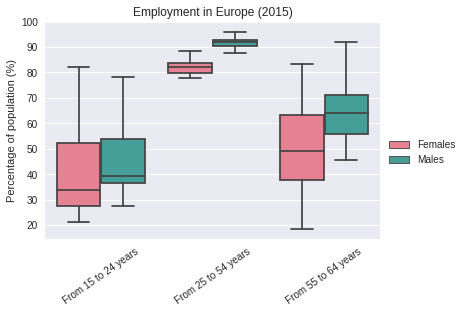

In [42]:
box = employ_f['2015'].unstack().reset_index()
sns.boxplot(x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=35)
plt.ylabel('Percentage of population (%)')
plt.title('Employment in Europe (2015)')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()